# Constrained Least Squares applications

## Portfolio optimization

**Compounded portfolio value**

The cumulative value of a portfolio from a return time series vector r, starting from the $ 10000, is given by the
value time series vector v, where

$
v_t = 10000(1 + r_1)(1 + r_2) \cdots (1+r_(t-1)),t=1, \cdots , T. 
$

In other words, we form the *cumulative* product of the vector with entries $ 1+r_t $.

Julia has a built in function that does this **cumprod**

In [21]:
cum_value(initial_money, r) = initial_money*cumprod(1 .+ r)

my_returns = [0.1; 0.1; 0.1]

cum_value(my_returns)

# generate random returns sequence 

# 10% annualized return
T = 250
mu = 0.1/T

# 5% annualized risk
sigma = 0.05/sqrt(T)

# vector of returns
r = mu .+ sigma*randn(T)

using VMLS
using Printf

@printf("r has annualized return %.4f, annualized risk %.4f\n", T*avg(r), sqrt(T)*stdev(r))

r has annualized return 0.1138, annualized risk 0.0445


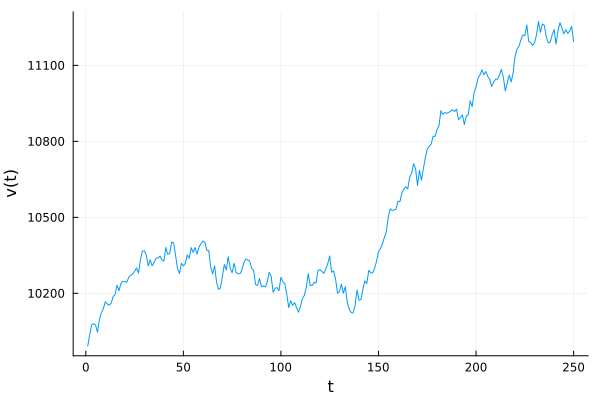

In [28]:
v = cum_value(10000, r)
v[T], v[1]*(1+sum(r))

using Plots
plot(1:T, v, legend=false)
plot!(xlabel="t", ylabel="v(t)")

### Portfolio optimization

Define a function **port_opt** that evaluates the solution of the constrained least squares  problem

and apply to the return data **R, Rtest = portfolio_data()**

In [30]:
R, Rtest = portfolio_data()
R

function port_opt(R ,rho)
    
    return w
end

port_opt (generic function with 1 method)

In [34]:
asset_avg_return(R) = [avg(R[:,k]) for k = 1:size(R,2)]
R = rand(1:6, 3, 2)

3×2 Matrix{Int64}:
 5  2
 3  5
 3  6

In [35]:
asset_avg_return(R)

2-element Vector{Float64}:
 3.6666666666666665
 4.333333333333333

In [41]:
function port_opt(R, rho)
    T, n = size(R)
    KKT = [
            2*R'*R             ones(n) asset_avg_return(R);
            ones(n)'                0                    0;
            asset_avg_return(R)'    0                    0 
    ]
    rhs = [
        2*R'*(rho*ones(T));
        1;
        rho
    ]
    xzhat = KKT \ rhs
    return xzhat[1:n]
end

port_opt (generic function with 1 method)

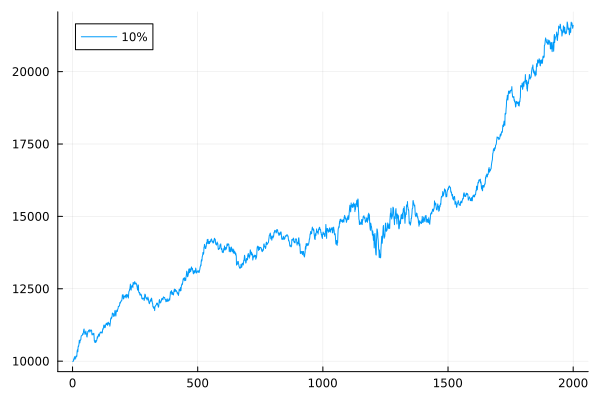

In [42]:
R, Rtest = portfolio_data()
T, n = size(R)

# Ask for 10% annual return
rho = 0.10/250

w = port_opt(R, rho)

# Portfolio return time series
r = R*w 
using Plots
plot(1:T, cum_value(10000, r), label="10%")